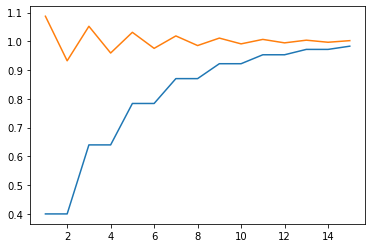

(0.3999999999999998, 0.4, -0.1127016653792583, -0.11270166537925828)

In [75]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)


N = 1000  # Nombre de tours de roulette
M = 1000  # Nombre de trajectoires    
z = 1  # Nombre de zéros

# n = 36  # Nombre de numéros (zéros exclus)
# f = np.zeros(n)
# f[1], f[2], f[5], f[8], f[11], f[17], f[35] = 6, 9, 22, 24, 26, 60, 37

n = 3  # Nombre de numéros (zéros exclus)
f = np.zeros(n)
f[1], f[2] = 1, 0

f /= np.sum(f)

p = lambda d: n / (n + z) / (d + 1)
p_g = 1 - f @ p(np.arange(n))

c = np.vectorize(lambda l: f[l:] @ p(np.arange(l, n)))
Q = np.append(c(np.arange(1, n)), -p_g)
x = np.roots(Q)
r = 1 / x

V = np.vander(x)
mu = -np.ones(n - 1) @ np.linalg.inv(V)
mu_real = -np.real(np.exp(np.sum(np.log((1 - x[:-1]) / (x[-1] - x[:-1])))))  # Quick leading term

q = np.vectorize(lambda k: 1 + np.real(mu @ r ** k))

k = np.arange(1, 5 * n + 1)
q_k = q(k)

plt.plot(k, q_k)
plt.plot(k, 1 + mu_real * np.real(r[-1]) ** k)
plt.show()

float(q(1)), z / (n + z) / p_g, np.real(mu[-1]), mu_real

$$1 = p_{g} r + \sum_{d = 1}^{n - 1} f_{d} p_{d} r^{-d}$$


In [76]:
P = lambda r: p_g * r + (f[1:] * p(np.arange(1, n))) @ (1 / r) ** np.arange(1, n)
P(r[1])

-0.9682458365518543

$$P(X) = \sum_{d = 1}^{n - 1} f_{d} p_{d} X^{d + 1} - X + p_{g}$$


In [77]:
X = np.roots(np.append(f[np.arange(n - 1, 0, -1)] * p(np.arange(n - 1, 0, -1)), np.array([-1, p_g])))

In [78]:
np.append(f[np.arange(n - 1, 0, -1)] * p(np.arange(n - 1, 0, -1)), np.array([-1, p_g]))

array([ 0.   ,  0.375, -1.   ,  0.625])

In [79]:
Q

array([ 0.375,  0.   , -0.625])

In [13]:
# k_half = 1 + int(np.log(-1 / 2 / mu_real) / np.log(np.real(r[-1])))
# k_half, q(k_half)

In [14]:
def show_phi(u0):
    du = np.random.choice(-np.arange(-1, n), size=(M, N), replace=True, p=np.append(p_g, f * p(np.arange(n))))
    u = u0 + np.hstack((np.zeros((M, 1)), np.cumsum(du, axis=1)))
    u_alive = ~np.cumsum(u<=0, axis=1).astype(bool)
    u_cutted = u*(u_alive)
    phi = np.mean(u_alive, axis=0)
    plt.title("Évolution des réserves monétaires avec accidents à couvrir")
    plt.xlabel("nombre de tours de roulette")
    plt.ylabel("fortune (en jetons)")
    plt.plot(u.T, c='gray')
    plt.plot(u_cutted.T)
    plt.show()
    plt.title("Probabilité de non-ruine")
    plt.xlabel("nombre de tours de roulette")
    plt.ylabel("probabilité")
    plt.plot(phi)
    plt.show()

In [15]:
def phi_inf(u0):
    du = np.random.choice(-np.arange(-1, n), size=(M, N), replace=True, p=np.append(p_g, f * p(np.arange(n))))
    u = u0 + np.hstack((np.zeros((M, 1)), np.cumsum(du, axis=1)))
    u_alive = ~np.cumsum(u<=0, axis=1).astype(bool)
    u_cutted = u*(u_alive)
    phi = np.mean(u_alive, axis=0)
    return phi[-1]

v_phi_inf = np.vectorize(phi_inf)

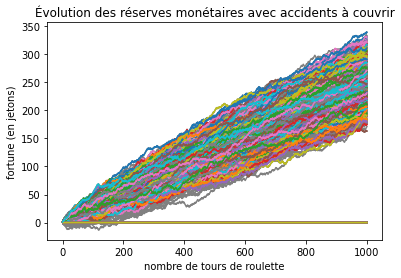

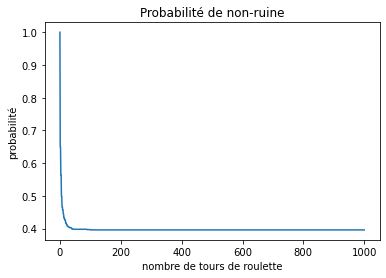

In [16]:
show_phi(1)

In [17]:
phi_k = v_phi_inf(k)

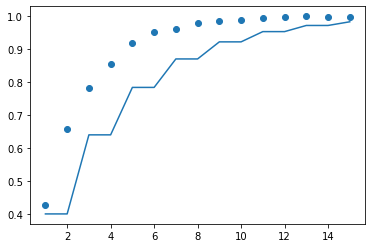

In [20]:
plt.plot(k, q_k)
# plt.plot(k, 1 + mu_real * np.real(r[-1]) ** k)
plt.scatter(k, phi_k)
plt.show()